In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [10]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [11]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [12]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

C:\Users\COMPUMARTS\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
history = cnn_model.fit(
    x_train_cnn, y_train_cat,
    validation_data=(x_test_cnn, y_test_cat),
    epochs=5,
    batch_size=128
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9386 - loss: 0.2120 - val_accuracy: 0.9791 - val_loss: 0.0651
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9819 - loss: 0.0591 - val_accuracy: 0.9869 - val_loss: 0.0405
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9876 - loss: 0.0404 - val_accuracy: 0.9880 - val_loss: 0.0356
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9896 - val_loss: 0.0311
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9924 - loss: 0.0241 - val_accuracy: 0.9902 - val_loss: 0.0317


In [15]:
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test_cat)
print("CNN Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0317
CNN Test accuracy: 0.9901999831199646


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


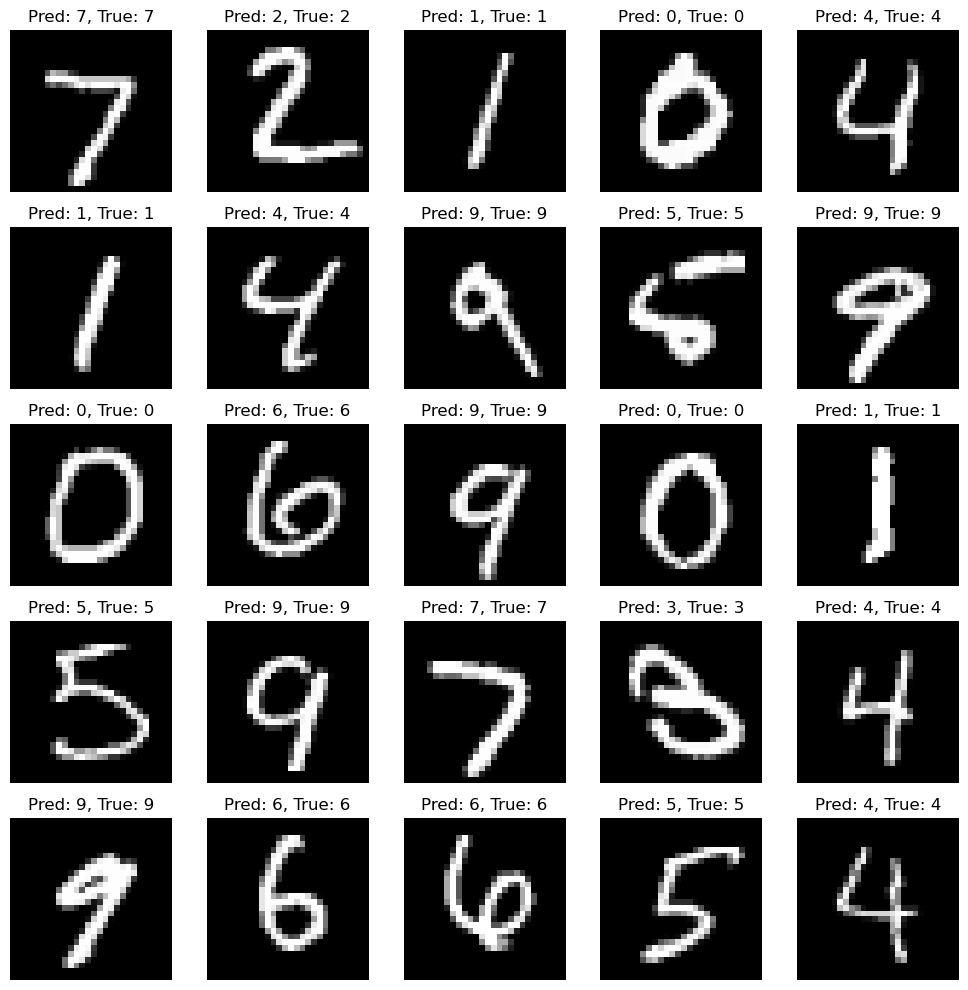

In [16]:
predictions = cnn_model.predict(x_test_cnn[:25])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = y_test[:25]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Pred: {predicted_labels[i]}, True: {true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
